In [1]:
from qiskit import *
from implementations.utils.helpers import *
from implementations.VBE.adder_VBE import mod_adder_VBE

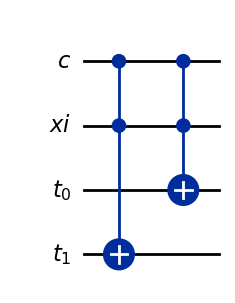

In [31]:
def cc_set_reset_to_num(num_qubits: int, num: int) -> QuantumCircuit:
    c = QuantumRegister(1, name="c")
    xi = QuantumRegister(1, name="xi")
    target = QuantumRegister(num_qubits, name="t")
    quantum_circuit = QuantumCircuit(c, xi, target)
    bit_string = bin(num)[2:]
    bit_string = bit_string.rjust(num_qubits, "0")
    for bit in range(len(bit_string)):
        if bit_string[bit] == "1":
            quantum_circuit.ccx(c[0], xi[0], target[num_qubits-bit-1])
    return quantum_circuit

cc_set_reset_to_num(2,3).draw("mpl")

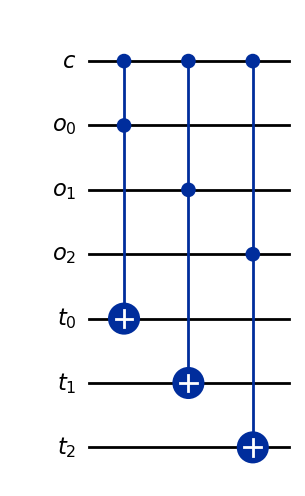

In [37]:
def c_copy(num_qubits: int) -> QuantumCircuit:
    c = QuantumRegister(1, name="c")
    origin = QuantumRegister(num_qubits, name="o")
    target = QuantumRegister(num_qubits, name="t")
    quantum_circuit = QuantumCircuit(c, origin, target)
    for i in range(num_qubits):
        quantum_circuit.ccx(c[0], origin[i], target[i])
    return quantum_circuit

c_copy(3).draw("mpl")

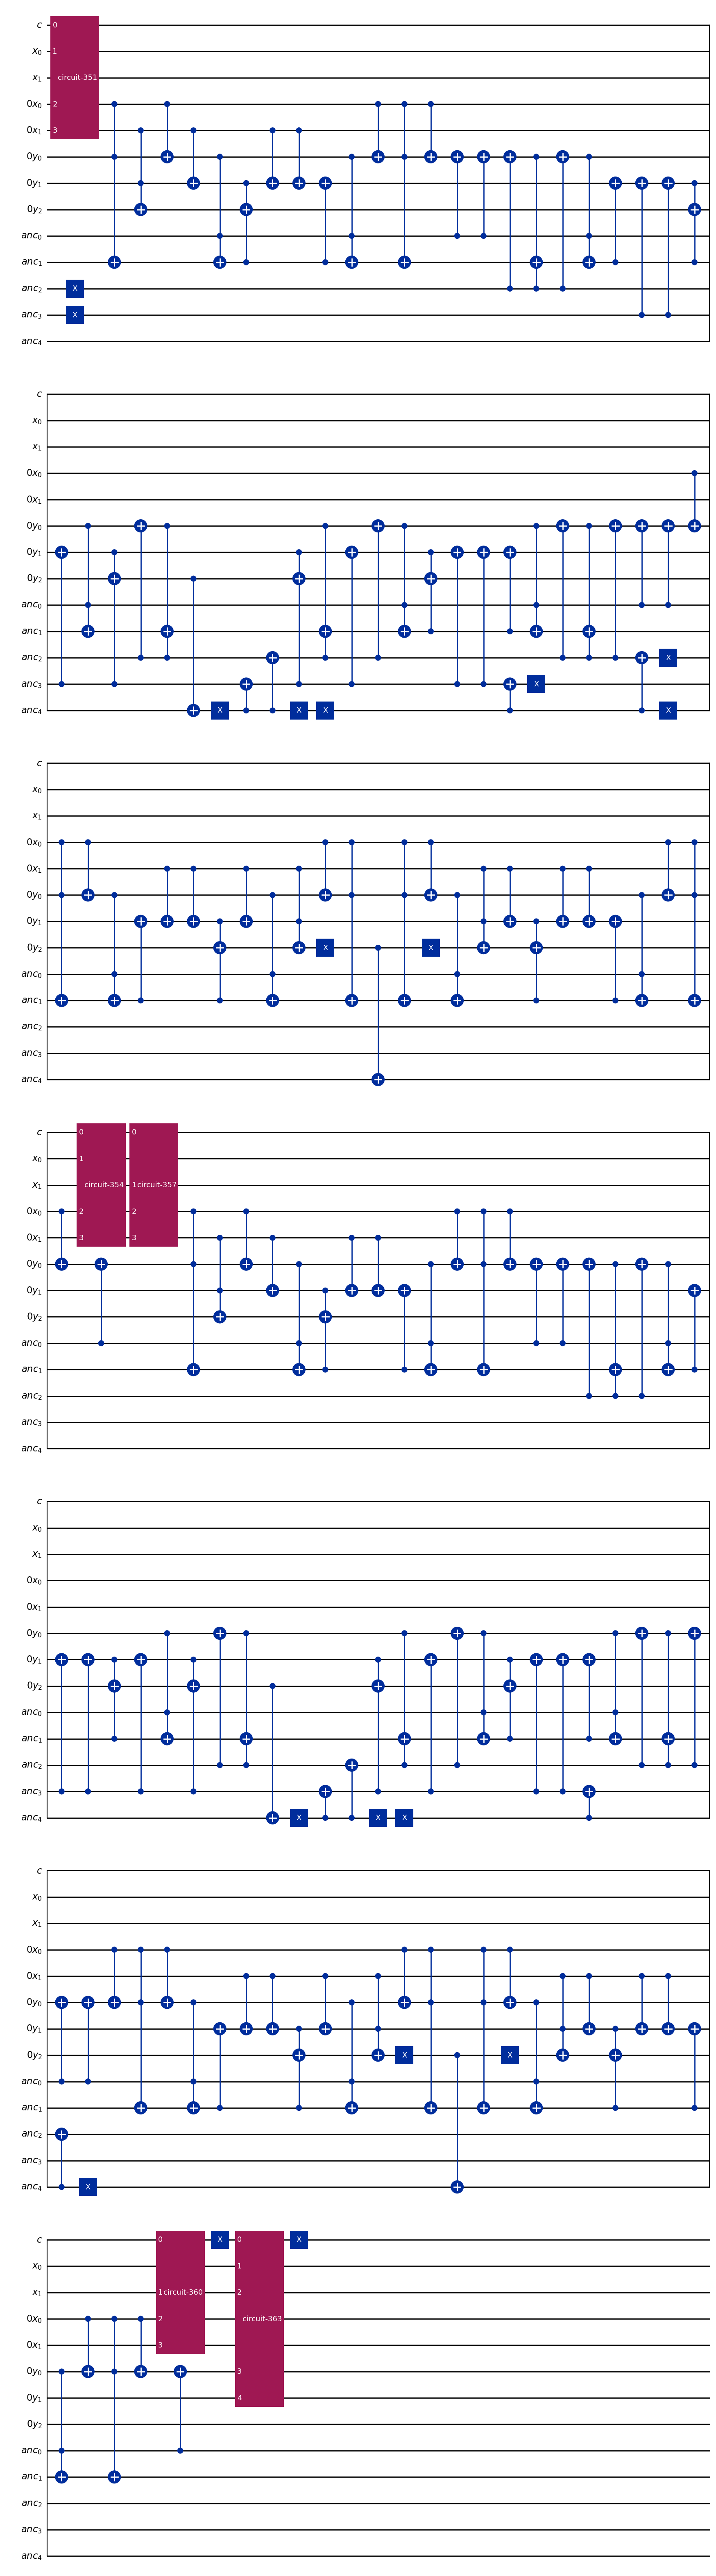

In [40]:
def c_mult_mod_VBE(num_qubits: int, a: int, N: int) -> QuantumCircuit:
    x = QuantumRegister(num_qubits, name="x")
    c = QuantumRegister(1, name="c")
    zero_x = QuantumRegister(num_qubits, name="0x")
    zero_y = QuantumRegister(num_qubits + 1, name="0y")
    anc = AncillaRegister(2*num_qubits + 1, name="anc")
    quantum_circuit = QuantumCircuit(c, x, zero_x, zero_y, anc)

    qc_adder = mod_adder_VBE(num_qubits, N)

    for i in range(num_qubits):
        number = ((2**i)*a)%N
        quantum_circuit.append(cc_set_reset_to_num(num_qubits, number), c[:] + x[i:i+1] + zero_x[:])
        quantum_circuit.compose(qc_adder, zero_x[:] + zero_y[:] + anc[:], inplace=True)
        quantum_circuit.append(cc_set_reset_to_num(num_qubits, number), c[:] + x[i:i+1] + zero_x[:])

    quantum_circuit.x(c[0])
    quantum_circuit.append(c_copy(num_qubits), c[:] + x[:] + zero_y[:num_qubits])
    quantum_circuit.x(c[0])
    return quantum_circuit

c_mult_mod_VBE(2, 1, 3).draw("mpl")